# HW 2: Supervised Learning Models
### Answer Guide created by Kate Moore, 2019

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np

# Supress Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.display.max_rows = 10

# Part 1: Regression on California Test Scores

## 1. Find the url for the California Test Score Data Set from the following website: https://vincentarelbundock.github.io/Rdatasets/datasets.html


In [2]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


## 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.  

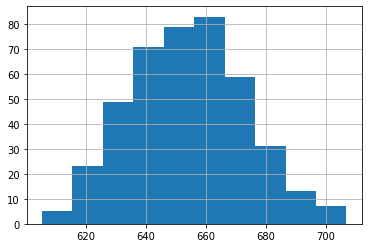

In [3]:
df['testscr'].hist()

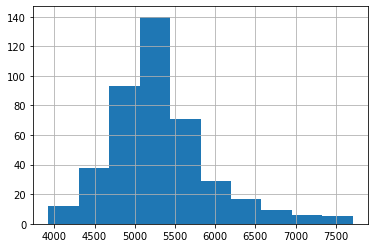

In [4]:
df['expnstu'].hist()

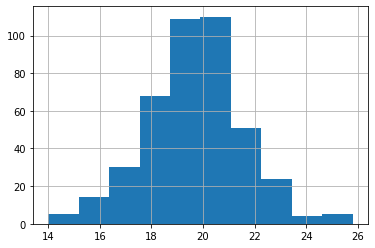

In [5]:
df['str'].hist()

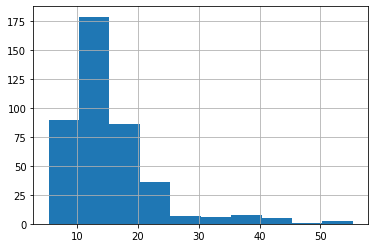

In [6]:
df['avginc'].hist()

## 1.2 Visualize the dependency of the target on each feature from 1.1.

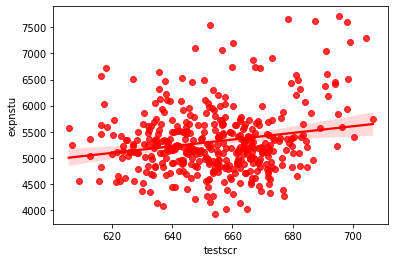

In [7]:
import seaborn as sns
x = sns.regplot(x="testscr", y="expnstu", data=df, color='r')

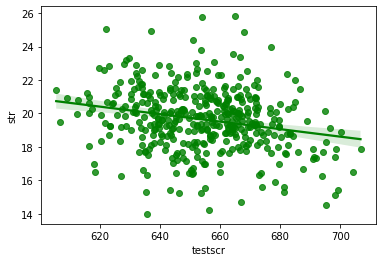

In [8]:
x = sns.regplot(x="testscr", y="str", data=df, color='g')

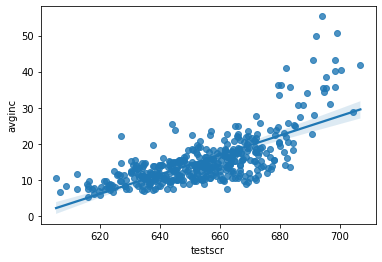

In [9]:
x = sns.regplot(x="testscr", y="avginc", data=df)

## 1.3a Split data in training and test set.

In [10]:
from sklearn.model_selection import train_test_split

corrected_data = df.drop(df.columns[[16, 17]], axis=1) # remove the reading and math scores from the dataset
data = corrected_data.iloc[:, 5:] # delete first six columns

y = data['testscr'] # assign outcome variable, i.e. what we want to predict
X = data.loc[:, data.columns != 'testscr'] # assign all other values as X-values, i.e. variables we use to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
# randomly assign some data to the test-set and the rest to the training-set

X.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


## 1.3b Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable.

In [0]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
# Set up function parameters for different cross validation strategies
kfold = KFold(n_splits=5) # I use this in PART 1.
skfold = StratifiedKFold(n_splits=5, shuffle=True) 
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1) # I use this in PART 2.

### KNN for regression with cross-validation

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=14) # Play around with n_neighbors to determine best fit
knn.fit(X_train, y_train)

print("KNN for REGRESSION (UNSCALED DATA)")

# Training and Test Scores
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, scoring='r2', cv=kfold))))

knn_unscaled = np.mean(cross_val_score(knn, X_train, y_train, scoring='r2', cv=kfold)) # Will use later to compare results

KNN for REGRESSION (UNSCALED DATA)
Training set score: 0.16
Test set score: 0.03
Mean Cross-Validation, Kfold: 0.03


**Note:** KNN Regression with unscaled data is not accurate.

### Linear Regression (OLS) with cross-validation

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train) # Fit the training data to a regression line

print("LINEAR REGRESSION (UNSCALED DATA)")
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(lr, X_train, y_train, cv=kfold))))

OLS_unscaled = np.mean(cross_val_score(lr, X_train, y_train, cv=kfold)) # Will use later to compare results

LINEAR REGRESSION (UNSCALED DATA)
Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, Kfold: 0.78


**Note:** Linear Regression with unscaled data has an avg. accuracy of 78%.

### Ridge with cross-validation

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01, max_iter=100000).fit(X_train, y_train) # Fit the training data to a ridge regression line

print("RIDGE REGRESSION (UNSCALED DATA)") # Ridge is L2 penalty, which adds “squared magnitude” of coefficient as penalty term to the loss function. Good for avoiding the over-fitting issue
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(ridge, X_train, y_train, cv=kfold))))

ridge_unscaled = np.mean(cross_val_score(ridge, X_train, y_train, cv=kfold)) # Will use later to compare results

RIDGE REGRESSION (UNSCALED DATA)
Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, Kfold: 0.78


**Note:** Ridge Regression with unscaled data has an avg. accuracy of 78%.

### LASSO with cross-validation

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) # Fit the training data to a lasso regression line with alpha = 0.01 and 100,000 iterations

print("LASSO REGRESSION (UNSCALED DATA)") # LASSO is L1 penalty, which adds “absolute value of magnitude” of coefficient as penalty term to the loss function. Good for feature selection when you have a lot of features.
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(lasso, X_train, y_train, cv=kfold))))

lasso_unscaled = np.mean(cross_val_score(lasso, X_train, y_train, cv=rkf)) # Will use later to compare results

LASSO REGRESSION (UNSCALED DATA)
Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, Kfold: 0.78


**Note:** Lasso regression with unscaled data as the same avg. accuracy as Ridge, 78%.

## 1.3c Does scaling the data with the StandardScaler help?

In [0]:
from sklearn import preprocessing

# Here, I standardize by X data using StandardScalar
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Scaled KNN Regression

In [18]:
knn = KNeighborsRegressor(n_neighbors=14).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold))))

knn_scaled = np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold))

KNN for REGRESSION (SCALED DATA)
Training set score: 0.77
Test set score: 0.76
Mean Cross-Validation, Kfold: 0.72


**Note:** Avg. accuracy of KNN model improves greatly with scaled data.

In [19]:
print("KNN with unscaled data: {:.2f}".format(knn_unscaled))
print("KNN with scaled data  : {:.2f}".format(knn_scaled))

KNN with unscaled data: 0.03
KNN with scaled data  : 0.72


### Scaled Linear Regression (OLS)

In [23]:
lr = LinearRegression().fit(X_train_scaled, y_train)

print("LINEAR REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(lr, X_train_scaled, y_train, cv=kfold))))

OLS_scaled = np.mean(cross_val_score(lr, X_train_scaled, y_train, cv=kfold))

LINEAR REGRESSION (SCALED DATA)
Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, Kfold: 0.78


**Note:** Avg. accuracy of linear regression model does not improve with scaled data.

In [24]:
print("Linear regression with unscaled data: {:.2f}".format(OLS_unscaled))
print("Linear regression with scaled data  : {:.2f}".format(OLS_scaled))

Linear regression with unscaled data: 0.78
Linear regression with scaled data  : 0.78


### Scaled Ridge Regression

In [25]:
ridge = Ridge(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)

print("RIDGE REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(ridge, X_train_scaled, y_train, cv=kfold))))

ridge_scaled = np.mean(cross_val_score(ridge, X_train_scaled, y_train, cv=kfold))

RIDGE REGRESSION (SCALED DATA)
Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, Kfold: 0.78


**Note:** Avg. accuracy of ridge model does not improve with scaled data.

In [26]:
print("Ridge regression with unscaled data: {:.2f}".format(ridge_unscaled))
print("Ridge regression with scaled data  : {:.2f}".format(ridge_scaled))

Ridge regression with unscaled data: 0.78
Ridge regression with scaled data  : 0.78


### Scaled Lasso Regression

In [27]:
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)

print("LASSO REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.2f}".format(np.mean(cross_val_score(lasso, X_train_scaled, y_train, cv=kfold))))

lasso_scaled = np.mean(cross_val_score(lasso, X_train_scaled, y_train, cv=rkf))

LASSO REGRESSION (SCALED DATA)
Training set score: 0.81
Test set score: 0.81
Mean Cross-Validation, Kfold: 0.78


**Note:** Avg. accuracy of LASSO model does not improve with scaled data.

In [28]:
print("LASSO regression with unscaled data: {:.2f}".format(lasso_unscaled))
print("LASSO regression with scaled data  : {:.2f}".format(lasso_scaled))

LASSO regression with unscaled data: 0.79
LASSO regression with scaled data  : 0.79


**Answer:** 
Scalling improves training scores for KNN, but affords little change to the other methods.

## 1.4 Tune the parameters of the models where possible using GridSearchCV. 

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

### GridsearchCV with KNN Regression

In [0]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
# print(knn_pipe.steps) 
# Name of step = 'kneighborsregressor' + __ + n_neighbors

knn_param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)} # remember, use two underscores before n, "__n"
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=kfold).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(knn_grid.score(X_test_scaled, y_test)))
#print("Best Cross-Validation Score: {:.2f}".format(knn_grid.best_score_))
print("Best Parameter: {}".format(knn_grid.best_params_))

KNN for REGRESSION (SCALED DATA)
Test set Score: 0.78
Best Parameter: {'kneighborsregressor__n_neighbors': 6}


**Note:** Best parameter for KNN is n_neighbors = 6

In [0]:
knn = KNeighborsRegressor(n_neighbors=6).fit(X_train_scaled, y_train)
print("KNN Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))
best_knn = knn.score(X_test_scaled, y_test)

KNN Test set score: 0.78


### GridsearchCV with Linear Regression (OLS)

**Note:** There are no parameters to 'tune' with OLS.

### Gridsearch with Ridge Regression

In [0]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge())
# print(ridge_pipe.steps) 
# Name of step = 'ridge' + __ + alpha

ridge_param_grid = {'ridge__alpha': np.linspace(0.1, 100.1, 1)}
ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=kfold).fit(X_train_scaled, y_train)

print("RIDGE REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(ridge_grid.score(X_test_scaled, y_test)))
#print("Best Cross-Validation Score: {:.2f}".format(ridge_grid.best_score_))
print("Best Parameter: {}".format(ridge_grid.best_params_))

RIDGE REGRESSION (SCALED DATA)
Test set Score: 0.81
Best Parameter: {'ridge__alpha': 0.1}


**Note:** Best parameter for ridge regression is alpha = 0.1

In [0]:
ridge = Ridge(alpha=0.1, max_iter=100000).fit(X_train_scaled, y_train)
print("Ridge test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))
best_ridge = np.mean(cross_val_score(ridge, X_train_scaled, y_train, cv=kfold))

Ridge test set score: 0.81


### Gridsearch with LASSO Regression

In [0]:
lasso_pipe = make_pipeline(StandardScaler(), Lasso())
# print(lasso_pipe.steps) 
# Name of step = 'lasso' + __ + alpha

lasso_param_grid = {'lasso__alpha': np.linspace(0.1, 100.0, 1)}
lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, cv=kfold).fit(X_train_scaled, y_train)

print("LASSO REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(lasso_grid.score(X_test_scaled, y_test)))
#print("Best Cross-Validation Score: {:.2f}".format(lasso_grid.best_score_))
print("Best Parameter: {}".format(lasso_grid.best_params_))

LASSO REGRESSION (SCALED DATA)
Test set Score: 0.81
Best Parameter: {'lasso__alpha': 0.1}


**Note:** Best parameter for lasso regression is alpha = 0.1

In [0]:
lasso = Lasso(alpha=0.1, max_iter=100000).fit(X_train_scaled, y_train)
print("LASSO test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))
best_lasso = np.mean(cross_val_score(lasso, X_train_scaled, y_train, cv=rkf))

LASSO test set score: 0.81


## Do the results improve?

In [0]:
print("KNN")
print("Before Gridsearch: {:.2f}".format(knn_scaled))
print("After Gridsearch: {:.2f}".format(best_knn))
print("")
print("RIDGE")
print("Before Gridsearch: {:.2f}".format(ridge_scaled))
print("After Gridsearch: {:.2f}".format(best_ridge))
print("")
print("LASSO")
print("Before Gridsearch: {:.2f}".format(lasso_scaled))
print("After Gridsearch: {:.2f}".format(best_lasso))

KNN
Before Gridsearch: 0.72
After Gridsearch: 0.78

RIDGE
Before Gridsearch: 0.78
After Gridsearch: 0.78

LASSO
Before Gridsearch: 0.79
After Gridsearch: 0.79


**Answer:** Yes. Tuning the parameters slightly improved each model, but KNN showed the only improvement that's really worthy of note.

## 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

**Note:** My two best linear models are Ridge and LASSO.

In [0]:
d = {'LASSO': lasso.coef_, 'Ridge': ridge.coef_} # Builds a dictionary with the coefficients from my LASSO & Ridge models
coefficients = pd.DataFrame(data=d, index=X.columns) # Puts the dictionary into a dataframe along with variable names
coefficients.head(10)

,LASSO,Ridge
enrltot,-0.000000,0.777656
teachers,-0.000000,-1.706045
calwpct,-1.015310,-1.181975
mealpct,-9.931920,-9.763967
computer,0.000000,1.022309
compstu,0.019521,-0.093965
expnstu,1.074776,1.155323
str,-0.580477,-0.669615
avginc,3.697999,3.720510
elpct,-3.349810,-3.483024


**Answer:** LASSO restricts (or shrinks) the less influential features to zero (see evidence in the code below). In this case, my LASSO has converted features with coefficients approximately between 0.5 and -0.5 to zero. Still, LASSO and Ridge agree on which features are important. For example, both models agree that **'mealpct'** has a negative relationship with 'testscr', while **'expnstu'** and **'anginc'** have a positive relationship with 'testscr'.

In [0]:
print("Number of features used with LASSO: {}".format(np.sum(lasso.coef_ != 0)))
print("Number of features used with Ridge: {}".format(np.sum(ridge.coef_ != 0)))

Number of features used with LASSO: 7
Number of features used with Ridge: 10


## 1.6 Discuss which final model you would choose to predict new data

**Answer:** While each model has its advantages, I recommend LASSO with alpha = 0.1.  It has a slightly higher cross validated accuracy than other models.  

# Part 2: Classification on red and white wine characteristics

First, import the red and the white wine csv files into separate pandas dataframes from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/Links to an external site.

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

In [0]:
r = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
w = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')
w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.

In [0]:
red = r.assign(winetype=1)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [0]:
white = w.assign(winetype=0)
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


Combine both datasets into a single dataframe.
The target data (i.e. the dependent variable) is "winetype".

In [0]:
mix = [white, red]
wines = pd.concat(mix)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


## 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

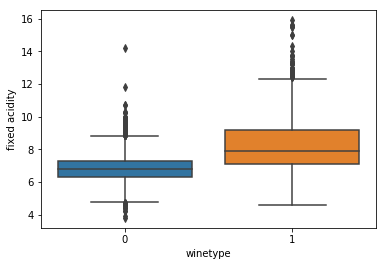

In [0]:
import matplotlib.pyplot as plt

sns.boxplot(x='winetype', y='fixed acidity', data=wines)

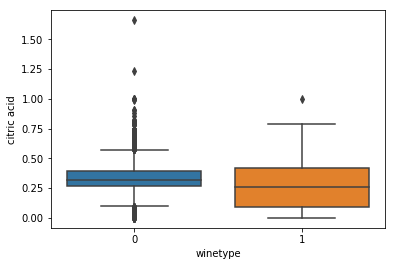

In [0]:
sns.boxplot(x='winetype', y='citric acid', data=wines)

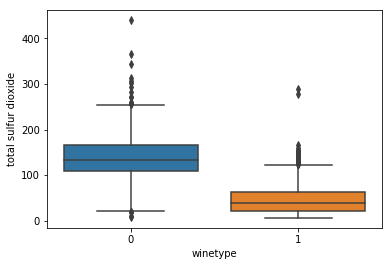

In [0]:
sns.boxplot(x='winetype', y='total sulfur dioxide', data=wines)

## 2.2a Split data into training and test set.

In [0]:
y = wines['winetype']
X = wines.loc[:, data.columns != 'winetype']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


## 2.2b Build models that evaluate the relationship between all available X variables in the dataset and the target variable.

### Logistic Regression using cross-validation

In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # I did this to remove all the warnings :)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("LOGISTIC REGRESSION (UNSCALED DATA)")
print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test))) 

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kfold))))

# Wine type prediction from test set (I'll use this later)
logreg_predicted_vals = logreg.predict(X_test)

# Organize the model coefficients
logreg_coef = pd.DataFrame(data=logreg.coef_, columns=X.columns, index=['Logistic Regression Coefficients'])
logreg_coef.head()

LOGISTIC REGRESSION (UNSCALED DATA)
Training set score: 0.98
Test set score: 0.98
Mean Cross Validation, KFold: 0.98


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Logistic Regression Coefficients,0.685901,8.223287,-0.971672,-0.149442,2.396549,0.048679,-0.063681,-3.126979,2.304279,6.044744,-0.790924


### Penalized Logistic Regression using cross-validation

In [0]:
pen_logreg = LogisticRegression(penalty = 'l1').fit(X_train, y_train) # Default = L2, Penalty = L1

print("PENALIZED LOGISTIC REGRESSION (UNSCALED DATA)")
print("Training set score: {:.2f}".format(pen_logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(pen_logreg.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(pen_logreg, X_train, y_train, cv=kfold))))

# Wine type prediction from test set (I'll use this later)
pen_logreg_predicted_vals = pen_logreg.predict(X_test)

# Organize the model coefficients
pen_logreg_coef = pd.DataFrame(data=pen_logreg.coef_, columns=X.columns, index=['Penalized Logistic Regression Coefficients'])

# Print coefficients for comparison
c = [logreg_coef, pen_logreg_coef]
coefs = pd.concat(c)
coefs.head()

PENALIZED LOGISTIC REGRESSION (UNSCALED DATA)
Training set score: 0.99
Test set score: 0.98
Mean Cross Validation, KFold: 0.99


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Logistic Regression Coefficients,0.685901,8.223287,-0.971672,-0.149442,2.396549,0.048679,-0.063681,-3.126979,2.304279,6.044744,-0.790924
Penalized Logistic Regression Coefficients,0.916169,11.539000,0.000000,-0.125501,15.207507,0.058481,-0.066548,-9.414764,4.759636,8.315734,-0.628853


### KNN Classifier using cross-validation

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# Notice that I'm using a Classifier here (as opposed to the Regressor we used in PART 1)

knn = KNeighborsClassifier().fit(X_train, y_train)

print("KNN CLASSIFER (UNSCALED DATA)")
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn, X_train, y_train, cv=kfold))))

# Wine type prediction from test set (I'll use this later)
y_pred = knn.predict(X_test)

KNN CLASSIFER (UNSCALED DATA)
Training set score: 0.96
Test set score: 0.94
Mean Cross Validation, KFold: 0.94


**Note:** KNN classifier can not produce coefficients. So we don't include them here.

## How different are the results?

In [0]:
# Organize predictions from each model into a dataframe
results = pd.DataFrame()
results = results.assign(L2=logreg_predicted_vals)
results = results.assign(L1=pen_logreg_predicted_vals)
results = results.assign(knn=y_pred)

# Count the combinations
print("COMBINATIONS OF PREDICTIONS: LOG REG by PEN LOG REG by KNN")
results.groupby(['L2','L1'])['knn'].count()

COMBINATIONS OF PREDICTIONS: LOG REG by PEN LOG REG by KNN


L2  L1
0   0     1241
    1        9
1   0        5
    1      370
Name: knn, dtype: int64

**Note:** KNN shows the highest count where the Logistic Regression and the Penalized Logistic Regression models agree (0, 0, 1241) and (1, 1, 370).

In [0]:
results.groupby(['L2','knn'])['L1'].count()

L2  knn
0   0      1217
    1        33
1   0        55
    1       320
Name: L1, dtype: int64

**Note:** Penalized Regressions shows the highest count where the Logistic Regression and the KNN models agree (0, 0, 1210) and (1, 1, 323). (Notice that Penlized Logistic Regression is less likely to agree with the combined predictions of KNN and Logistic Regression than KNN is to agree with the combined predictions of Logistic Regression and Penalized Regression).

In [0]:
results.groupby(['knn','L1'])['L2'].count()

knn  L1
0    0     1212
     1       60
1    0       34
     1      319
Name: L2, dtype: int64

**Note:** Logistic Regressions shows the highest count where the KNN and Penalized Logistic Regression models agree (0, 0, 1205) and (1, 1, 322). (Notice that Logistic  Regression is also less likely to agree with the combined predictions of KNN and Penalized Logistic Regression than KNN is to agree with the combined predictions of Logistic Regression and Penalized Regression. This is a similar pattern noted in the previous cell).

**Answer:** The regressions are more accurate than the nearest neighbor (Logisic Regression Accuracy = 0.98, Penalized Logistic Regression Accuracy = 0.99, KNN Accuracy = 0.94). This is most likely the result of their predicting slightly different results. Logistic Regression and Penalized Logistic Regression tend to make similar predictions - only disagreeing in about 10 instances - while the KNN Classifier model disagrees with the logistic model predictions by in about 50 instances.

## How does scaling the data with StandardScaler influence the results?

In [0]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Scaled Logistic Regression using cross-validation

In [0]:
logreg_scaled = LogisticRegression().fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(logreg_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(logreg_scaled, X_train_scaled, y_train, cv=kfold))))

# Organize the model coefficients
logreg_scaled_coef = pd.DataFrame(data=logreg_scaled.coef_, columns=X.columns, index=['Scaled Logistic Regression Coefficients'])

# Print coefficients for comparison
c2 = [logreg_coef, pen_logreg_coef, logreg_scaled_coef]
coefs = pd.concat(c2)
coefs.head()

LOGISTIC REGRESSION (SCALED DATA)
Training set score: 0.99
Test set score: 0.99
Mean Cross Validation, KFold: 0.99


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Logistic Regression Coefficients,0.685901,8.223287,-0.971672,-0.149442,2.396549,0.048679,-0.063681,-3.126979,2.304279,6.044744,-0.790924
Penalized Logistic Regression Coefficients,0.916169,11.539000,0.000000,-0.125501,15.207507,0.058481,-0.066548,-9.414764,4.759636,8.315734,-0.628853
Scaled Logistic Regression Coefficients,0.285976,1.186533,-0.361232,-3.261851,0.751859,0.986030,-2.885655,3.519493,0.270010,0.624173,1.282744


### Scaled Penalized Logistic Regression using cross-validation

In [0]:
pen_logreg_scaled = LogisticRegression(penalty = 'l1').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Training set score: {:.2f}".format(pen_logreg_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(pen_logreg_scaled.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation 
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(pen_logreg_scaled, X_train, y_train, cv=kfold))))

# Organize the model coefficients
pen_logreg_scaled_coef = pd.DataFrame(data=pen_logreg_scaled.coef_, columns=X.columns, index=['Scaled Penalized Logistic Regression Coefficients'])

# Print coefficients for comparison
c3 = [logreg_coef, pen_logreg_coef, logreg_scaled_coef, pen_logreg_scaled_coef]
coefs = pd.concat(c3)
coefs.head()

PENALIZED LOGISTIC REGRESSION (SCALED DATA)
Training set score: 0.99
Test set score: 0.99
Mean Cross Validation, KFold: 0.99


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Logistic Regression Coefficients,0.685901,8.223287,-0.971672,-0.149442,2.396549,0.048679,-0.063681,-3.126979,2.304279,6.044744,-0.790924
Penalized Logistic Regression Coefficients,0.916169,11.539000,0.000000,-0.125501,15.207507,0.058481,-0.066548,-9.414764,4.759636,8.315734,-0.628853
Scaled Logistic Regression Coefficients,0.285976,1.186533,-0.361232,-3.261851,0.751859,0.986030,-2.885655,3.519493,0.270010,0.624173,1.282744
Scaled Penalized Logistic Regression Coefficients,-0.043429,1.140855,-0.401142,-4.527656,0.745173,1.209947,-3.092901,4.662637,0.000000,0.517186,1.847429


### Scaled KNN using cross validation

In [0]:
knn_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)

print("KNN CLASSIFER (SCALED DATA)")
print("Training set score: {:.2f}".format(knn_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn_scaled.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.2f}".format(np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train, cv=kfold))))

KNN CLASSIFER (SCALED DATA)
Training set score: 0.98
Test set score: 0.97
Mean Cross Validation, KFold: 0.96


**Note:** KNN classifier can not produce coefficients. So we don't include them here.

In [0]:
print("LOGISTIC REGRESSION")
print("Unscaled: {:.2f}".format(logreg.score(X_test, y_test)))
print("Scaled: {:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))
print("")
print("PENALIZED LOGISTIC REGRESSION")
print("Unscaled: {:.2f}".format(pen_logreg.score(X_test, y_test)))
print("Scaled: {:.2f}".format(pen_logreg_scaled.score(X_test_scaled, y_test)))
print("")
print("KNN CLASSIFIER")
print("Unscaled: {:.2f}".format(knn.score(X_test, y_test)))
print("Scaled: {:.2f}".format(knn_scaled.score(X_test_scaled, y_test)))

LOGISTIC REGRESSION
Unscaled: 0.98
Scaled: 0.99

PENALIZED LOGISTIC REGRESSION
Unscaled: 0.98
Scaled: 0.99

KNN CLASSIFIER
Unscaled: 0.94
Scaled: 0.97


**Answer:** Scalling the data with StandardScaler improves the results for all models, particularly for KNN.

## 2.3 Tune the parameters where possible using GridSearchCV.

### GridsearchCV with Logistic Regression

In [0]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
#print(logreg_pipe.steps) 
# Name of step = 'logisticregression' + __ + C

logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(logreg_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(logreg_grid.best_params_))

LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'logisticregression__C': 2.0}


### GridsearchCV with Penalized Logistic Regression

In [0]:
pen_logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1'))
#print(pen_logreg_pipe.steps) 
# Name of step = 'logisticregression' + __ + C

pen_logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
pen_logreg_grid = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(pen_logreg_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))

PENLIZED LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'logisticregression__C': 1.0}


### GridsearchCV with KNN Classifier

In [0]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(knn_grid.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(knn_grid.best_params_))

KNN for REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'kneighborsclassifier__n_neighbors': 2}


## Do the results improve?

In [0]:
print("LOGISTIC REGRESSION")
print("Before Gridsearch: {:.2f}".format(logreg_scaled.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.2f}".format(logreg_grid.score(X_test_scaled, y_test)))
print("")
print("PENALIZED LOGISTIC REGRESSION")
print("Before Gridsearch: {:.2f}".format(pen_logreg_scaled.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.2f}".format(pen_logreg_grid.score(X_test_scaled, y_test)))
print("")
print("KNN CLASSIFIER")
print("Before Gridsearch: {:.2f}".format(knn_scaled.score(X_test_scaled, y_test)))
print("After Gridsearch: {:.2f}".format(knn_grid.score(X_test_scaled, y_test)))

LOGISTIC REGRESSION
Before Gridsearch: 0.99
After Gridsearch: 0.99

PENALIZED LOGISTIC REGRESSION
Before Gridsearch: 0.99
After Gridsearch: 0.99

KNN CLASSIFIER
Before Gridsearch: 0.97
After Gridsearch: 0.99


**Answer:** Parameters recommended by Gridsearch make noticable improvements to the accuracy score for the KNN model, but new parameters recommended by Gridsearch do not a remarakable difference for the accuracy scores of the Logistic or Penalized Logistic Regression models.

## 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling.

In [0]:
# Note: See code above for kfold, skfold, and rkf. 
# Here, I am going to use the rkf code.
# rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

**Note:** For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Because our data uses 'winetype' as a target, our data qualifies as binary/multiclass. This means that StratigiedKFold (skfold) will be a default of GridsearchCV. To change this default setting and to include shuffling, we need to set cv= Repeated KFold (rkf). 

### GridsearchCV of Logistic Regression with Repeated KFold (rkf)

In [0]:
logreg_grid_rfk = GridSearchCV(logreg_pipe, logreg_param_grid, cv=rkf).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(logreg_grid_rfk.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(logreg_grid_rfk.best_params_))

LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'logisticregression__C': 28.0}


### GridsearchCV of Penalized Logistic Regression with Repeated KFold (rkf)

In [0]:
pen_logreg_grid_rfk = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid, cv=rkf).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(pen_logreg_grid_rfk.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(pen_logreg_grid_rfk.best_params_))

PENLIZED LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'logisticregression__C': 1.0}


### GridsearchCV of KNN Classifier with Repeated KFold (rkf)

In [0]:
knn_grid_rfk = GridSearchCV(knn_pipe, knn_param_grid, cv=rkf).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(knn_grid_rfk.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(knn_grid_rfk.best_params_))

KNN for REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'kneighborsclassifier__n_neighbors': 6}


## Do the parameters for models that can be tuned change? 

In [0]:
# Comparing parameters with and without Kfold shuffling
print("Parameters for LOGISTIC REGRESSION")
print("KFold w/out Shuffling: {}".format(logreg_grid.best_params_))
print("       Repeated KFold: {}".format(logreg_grid_rfk.best_params_))
print("")
print("Parameters for PENALIZED LOGISTIC REGRESSION")
print("KFold w/out Shuffling: {}".format(pen_logreg_grid.best_params_))
print("       Repeated KFold: {}".format(pen_logreg_grid_rfk.best_params_))
print("")
print("Parameters for KNN CLASSIFIER")
print("KFold w/out Shuffling: {}".format(knn_grid.best_params_))
print("       Repeated KFold: {}".format(knn_grid_rfk.best_params_))

Parameters for LOGISTIC REGRESSION
KFold w/out Shuffling: {'logisticregression__C': 2.0}
       Repeated KFold: {'logisticregression__C': 28.0}

Parameters for PENALIZED LOGISTIC REGRESSION
KFold w/out Shuffling: {'logisticregression__C': 1.0}
       Repeated KFold: {'logisticregression__C': 1.0}

Parameters for KNN CLASSIFIER
KFold w/out Shuffling: {'kneighborsclassifier__n_neighbors': 2}
       Repeated KFold: {'kneighborsclassifier__n_neighbors': 6}


**Answer:** Yes. After changing the cross validation method from skfold to kfold, the parameters recommended by gridsearchCV are C=28 for the Logistic Regression (previously C=2), and n_neighbors=6 for KNN Classifier (previously n_neighbors=2). Gridsearch does not recommend different parameters for the Penalized Logistic Regression model.

## Do they change if you change the random seed of the shuffling?

In [0]:
# Change random_state=None to random_state=1
rkf_1 = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

### GridsearchCV of Logistic Regression with Repeated KFold (rkf) and new random seed

In [0]:
logreg_grid_rfk_1 = GridSearchCV(logreg_pipe, logreg_param_grid, cv=rkf_1).fit(X_train_scaled, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(logreg_grid_rfk_1.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(logreg_grid_rfk_1.best_params_))

LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'logisticregression__C': 28.0}


### GridsearchCV of Penalized Logistic Regression with Repeated KFold (rkf) and new random seed

In [0]:
pen_logreg_grid_rfk_1 = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid, cv=rkf_1).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(pen_logreg_grid_rfk_1.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(pen_logreg_grid_rfk_1.best_params_))

PENLIZED LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'logisticregression__C': 1.0}


### GridsearchCV of KNN Classifier with Repeated KFold (rkf) and new random seed

In [0]:
knn_grid_rfk_1 = GridSearchCV(knn_pipe, knn_param_grid, cv=rkf_1).fit(X_train_scaled, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(knn_grid_rfk_1.score(X_test_scaled, y_test)))
print("Best Parameter: {}".format(knn_grid_rfk_1.best_params_))

KNN for REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'kneighborsclassifier__n_neighbors': 6}


In [0]:
# Comparing parameters with new random seed
print("Parameters for LOGISTIC REGRESSION")
print("     KFold w/out Shuffling: {}".format(logreg_grid.best_params_))
print("            Repeated KFold: {}".format(logreg_grid_rfk.best_params_))
print("Repeated KFold w/ new seed: {}".format(logreg_grid_rfk_1.best_params_))
print("")
print("Parameters for PENALIZED LOGISTIC REGRESSION")
print("     KFold w/out Shuffling: {}".format(pen_logreg_grid.best_params_))
print("            Repeated KFold: {}".format(pen_logreg_grid_rfk.best_params_))
print("Repeated KFold w/ new seed: {}".format(pen_logreg_grid_rfk_1.best_params_))
print("")
print("Parameters for KNN CLASSIFIER")
print("     KFold w/out Shuffling: {}".format(knn_grid.best_params_))
print("            Repeated KFold: {}".format(knn_grid_rfk.best_params_))
print("Repeated KFold w/ new seed: {}".format(knn_grid_rfk_1.best_params_))

Parameters for LOGISTIC REGRESSION
     KFold w/out Shuffling: {'logisticregression__C': 2.0}
            Repeated KFold: {'logisticregression__C': 28.0}
Repeated KFold w/ new seed: {'logisticregression__C': 28.0}

Parameters for PENALIZED LOGISTIC REGRESSION
     KFold w/out Shuffling: {'logisticregression__C': 1.0}
            Repeated KFold: {'logisticregression__C': 1.0}
Repeated KFold w/ new seed: {'logisticregression__C': 1.0}

Parameters for KNN CLASSIFIER
     KFold w/out Shuffling: {'kneighborsclassifier__n_neighbors': 2}
            Repeated KFold: {'kneighborsclassifier__n_neighbors': 6}
Repeated KFold w/ new seed: {'kneighborsclassifier__n_neighbors': 6}


**Answer:** Changing the random seed of the shuffling didn't change the recommended parameters for any of the models.

## Or if you change the random state of the split into training and test data?

In [0]:
# Resplit the data using a new random_state, 1000 (instead of 42)
X_train_newsplit, X_test_newsplit, y_train_newsplit, y_test_newsplit = train_test_split(X, y, random_state=1000)

# Scale new split data
scaler = preprocessing.StandardScaler().fit(X_train_newsplit)
X_train_scaled_newsplit = scaler.transform(X_train_newsplit)
X_test_scaled_newsplit = scaler.transform(X_test_newsplit)

### GridsearchCV of Logistic Regression with... 
* Repeated KFold (rkf)
* Random Seed = 1
* New random split into training and test data

In [0]:
logreg_grid_rfk_1_newsplit = GridSearchCV(logreg_pipe, logreg_param_grid, cv=rkf_1).fit(X_train_scaled_newsplit, y_train_newsplit)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(logreg_grid_rfk_1.score(X_test_scaled_newsplit, y_test_newsplit)))
print("Best Parameter: {}".format(logreg_grid_rfk_1_newsplit.best_params_))

LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 1.00
Best Parameter: {'logisticregression__C': 10.0}


### GridsearchCV of Penalized Logistic Regression with...
* Repeated KFold (rkf)
* Random Seed = 1
* New random split into training and test data

In [0]:
pen_logreg_grid_rfk_1_newsplit = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid, cv=rkf_1).fit(X_train_scaled_newsplit, y_train_newsplit)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(pen_logreg_grid_rfk_1_newsplit.score(X_test_scaled_newsplit, y_test_newsplit)))
print("Best Parameter: {}".format(pen_logreg_grid_rfk_1_newsplit.best_params_))

PENLIZED LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'logisticregression__C': 2.0}


### GridsearchCV of KNN Classifier with...
* Repeated KFold (rkf)
* Random Seed = 1
* New random split into training and test data

In [0]:
knn_grid_rfk_1_newsplit = GridSearchCV(knn_pipe, knn_param_grid, cv=rkf_1).fit(X_train_scaled_newsplit, y_train_newsplit)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(knn_grid_rfk_1_newsplit.score(X_test_scaled_newsplit, y_test_newsplit)))
print("Best Parameter: {}".format(knn_grid_rfk_1_newsplit.best_params_))

KNN for REGRESSION (SCALED DATA)
Test set Score: 0.99
Best Parameter: {'kneighborsclassifier__n_neighbors': 1}


In [0]:
# Comparing parameters with new random seed and newly split training & testing data
print("Parameters for LOGISTIC REGRESSION")
print("                      KFold w/out Shuffling: {}".format(logreg_grid.best_params_))
print("                             Repeated KFold: {}".format(logreg_grid_rfk.best_params_))
print("                 Repeated KFold w/ new seed: {}".format(logreg_grid_rfk_1.best_params_))
print("Repeated KFold w/ new seed & new data split: {}".format(logreg_grid_rfk_1_newsplit.best_params_))
print("")
print("Parameters for PENALIZED LOGISTIC REGRESSION")
print("                      KFold w/out Shuffling: {}".format(pen_logreg_grid.best_params_))
print("                             Repeated KFold: {}".format(pen_logreg_grid_rfk.best_params_))
print("                 Repeated KFold w/ new seed: {}".format(pen_logreg_grid_rfk_1.best_params_))
print("Repeated KFold w/ new seed & new data split: {}".format(pen_logreg_grid_rfk_1_newsplit.best_params_))
print("")
print("Parameters for KNN CLASSIFIER")
print("                      KFold w/out Shuffling: {}".format(knn_grid.best_params_))
print("                             Repeated KFold: {}".format(knn_grid_rfk.best_params_))
print("                 Repeated KFold w/ new seed: {}".format(knn_grid_rfk_1.best_params_))
print("Repeated KFold w/ new seed & new data split: {}".format(knn_grid_rfk_1_newsplit.best_params_))

Parameters for LOGISTIC REGRESSION
                      KFold w/out Shuffling: {'logisticregression__C': 2.0}
                             Repeated KFold: {'logisticregression__C': 28.0}
                 Repeated KFold w/ new seed: {'logisticregression__C': 28.0}
Repeated KFold w/ new seed & new data split: {'logisticregression__C': 10.0}

Parameters for PENALIZED LOGISTIC REGRESSION
                      KFold w/out Shuffling: {'logisticregression__C': 1.0}
                             Repeated KFold: {'logisticregression__C': 1.0}
                 Repeated KFold w/ new seed: {'logisticregression__C': 1.0}
Repeated KFold w/ new seed & new data split: {'logisticregression__C': 2.0}

Parameters for KNN CLASSIFIER
                      KFold w/out Shuffling: {'kneighborsclassifier__n_neighbors': 2}
                             Repeated KFold: {'kneighborsclassifier__n_neighbors': 6}
                 Repeated KFold w/ new seed: {'kneighborsclassifier__n_neighbors': 6}
Repeated KFold w/ n

**Answer:** Re-splitting the data into new training and new test data with a different random state changes the recommended parameters for all three models.

## 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [0]:
# This dataframe is built using the c3 object that was created earlier in the code
coefs = pd.concat(c3)
coefs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Logistic Regression Coefficients,0.685901,8.223287,-0.971672,-0.149442,2.396549,0.048679,-0.063681,-3.126979,2.304279,6.044744,-0.790924
Penalized Logistic Regression Coefficients,0.916169,11.539000,0.000000,-0.125501,15.207507,0.058481,-0.066548,-9.414764,4.759636,8.315734,-0.628853
Scaled Logistic Regression Coefficients,0.285976,1.186533,-0.361232,-3.261851,0.751859,0.986030,-2.885655,3.519493,0.270010,0.624173,1.282744
Scaled Penalized Logistic Regression Coefficients,-0.043429,1.140855,-0.401142,-4.527656,0.745173,1.209947,-3.092901,4.662637,0.000000,0.517186,1.847429


**Note 1:** Scaling the data really minimizes the variation between the coefficients. Notice how coefficients of 'chlorides' are very different for Logistic Regression and Penalized Logistic Regression, but then when the data is scaled this difference is almost entirely minimized. Before scaling, 'chlorides' seemed like an important variable; after scaling, not so much. 

**Note 2:** The scaled data is also a little easier to interpret. After scaling, both the Logistic Regression and Penalized Logistic Regression models agree that 'volatile acidity', 'density', and 'alcohol' are important variables / features in determining 'winetype'. 

**Answer:** I would use Penalized Logistic Regression (L2 penalty) with scaled data to predict new data.  It has the added benefit of highlighting important varaibles. (Though several models predicted cross validated data and test data equally well such that students could justify choosing other models)